In [1]:
from lookup import LookupCreator
from sensepolar.polarity import WordPolarity
from sensepolar.embed.bertEmbed import BERTWordEmbeddings
from sensepolar.embed.gptEmbed import GPT2WordEmbeddings
from sensepolar.embed.robertaEmbed import RoBERTaWordEmbeddings
from sensepolar.embed.albertEmbed import ALBERTWordEmbeddings
from sensepolar.polarDim import PolarDimensions
from sensepolar.oracle.dictionaryapi import Dictionary
from sensepolar.plotter import PolarityPlotter
import nltk
from nltk.stem import PorterStemmer
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'notebook'

In [2]:
def read_word_context_file(file_path):
    stemmer = PorterStemmer()
    with open(file_path, 'r') as f:
        content = f.read()
    lines = content.strip().split('\n')
    words = []
    contexts = []
    for line in lines:
        split_line = [item.strip() for item in line.split(',')]
        words.append(split_line[0])
        contexts.append(split_line[1])
    replaced_context = []
    for i, context in enumerate(contexts):
        context_words = context.split()
        replaced_words = [words[i] if stemmer.stem(w) == stemmer.stem(words[i]) else w for w in context_words]
        replaced_sentence = ' '.join(replaced_words)
        replaced_context.append(replaced_sentence)
    return words, replaced_context

# read_word_context_file('data/word_context.csv')

# Bert Embeddings

In [3]:
out_path = './antonyms/'
antonym_path = "data/data_file1.xlsx"

dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonyms_file_path=antonym_path)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, contexts = read_word_context_file('data/word_context1.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection')

polar_dimensions = []
for word, context in zip(words, contexts):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['happy', 'sad']": {'happy': ['i feel happy today '], 'sad': ['he looks sad ']}, "['hot', 'cold']": {'hot': ['it s hot outside '], 'cold': ['the ice is cold to touch ']}, "['big', 'small']": {'big': ['the elephant is big '], 'small': ['the ant is small ']}, "['fast', 'slow']": {'fast': ['the cheetah runs fast '], 'slow': ['the snail moves slow ']}, "['good', 'bad']": {'good': ['eating healthy food is good for you '], 'bad': ['smoking is bad for your health ']}}
Loading antonyms from ./antonyms/lookup_anto_example_dict.pkl
Top: 1
Dimension: hot <------> cold
high temperature  low temperature
Definitions:  high temperature <------>low temperature
Value: -6.34002


Top: 2
Dimension: good <------> bad
positive negative
Definitions:  positive<------>negative
Value: -1.7328382


Top: 3
Dimension: happy <------> sad
feeling of joy feeling of sorrow
Definitions:  feeling of joy<------>feeling of sorrow
Value: -1.5031822


Top: 4
Dimension: fast <------> slow
high speed  low speed
Definitions

In [4]:
out_path = './antonyms/'
# antonym_path = "data/data_file.xlsx"
antonym_pairs = [['right', 'wrong'],  ['good', 'bad'],['happy', 'sad']]
indices  = [[0,0], [1, 0], [0, 0]]

antonym_pairs_updated = []
for pair, index in zip(antonym_pairs, indices):
    updated_pair = [f"{pair[0]}_{index[0]}", f"{pair[1]}_{index[1]}"]
    antonym_pairs_updated.append(updated_pair)
    
# dictionary = Dictionary('wordnet', api_key='')    
dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=antonym_pairs_updated)
lookupSpace.create_lookup_files(indices=indices)

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, contexts = ['sun', 'trees'], ['sun rises in the east', 'trees are green in color']
# read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection')

polar_dimensions = []
for word, context in zip(words, contexts):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)
    print(dimension)

[['right_0', 'wrong_0'], ['good_1', 'bad_0'], ['happy_0', 'sad_0']]
right
['a right line', 'The kitchen counter formed a right angle with the back wall.', 'a right triangle, a right prism, a right cone', "I thought you'd made a mistake, but it seems you were right all along.", 'Is this the right software for my computer?', "I'm afraid my father is no longer in his right mind.", "You've made a right mess of the kitchen!", 'After the accident, her right leg was slightly shorter than her left.', 'the right side of a piece of cloth', 'Luckily we arrived right at the start of the film.', "Can't you see it? It's right beside you!", "I made a right stupid mistake there, didn't I?", "Do it right or don't do it at all.", "Members of the Queen's Privy Council are styled The Right Honourable for life.", "You're going, right?", "We're on the side of right in this contest.", 'You have no right to go through my personal diary.', 'The pharmacy is just on the right past the bookshop.', 'The political 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['right_0', 'wrong_0']": {'right_0': ['a right line '], 'wrong_0': ['injustice is a heinous wrong ']}, "['good_1', 'bad_0']": {'good_1': ['good friday '], 'bad_0': ['abducting children is bad for mothers ']}, "['happy_0', 'sad_0']": {'happy_0': ['music makes me feel happy '], 'sad_0': ['i can t believe you use drugs you re so sad ']}}
This word is missing in a corresponding example sentence: right_0
Unable to create POLAR dimensions.
Loading antonyms from ./antonyms/lookup_anto_example_dict.pkl
[(0, -0.45276192), (1, -0.023042407)]
Top: 1
Dimension: right_0 <------> wrong_0
['Straight, not bent.'] ['Something that is immoral or not good.']
Definitions:  Straight, not bent.<------>Something that is immoral or not good.
Value: -0.45276192


Top: 2
Dimension: good_1 <------> bad_0
['Holy (especially when capitalized) .'] ['Unfavorable; negative; not good.']
Definitions:  Holy (especially when capitalized) .<------>Unfavorable; negative; not good.
Value: -0.023042407


[(('right_0', 'Str

In [8]:
out_path = './antonyms/'
# antonym_path = "data/data_file.xlsx"
antonym_pairs = [['right', 'wrong'], ['good', 'bad'],["move", "steady"]]
indices  = [[1,0],[2,0],[1,0]]

antonym_pairs_updated = []
for pair, index in zip(antonym_pairs, indices):
    updated_pair = [f"{pair[0]}_{index[0]}", f"{pair[1]}_{index[1]}"]
    antonym_pairs_updated.append(updated_pair)
    
dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=antonym_pairs_updated)
lookupSpace.create_lookup_files(indices=indices)

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, contexts = ['sun', 'trees'], ['sun rises in the east', 'trees are green in color']
# read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection')

polar_dimensions = []
for word, context in zip(words, contexts):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)
    print(dimension)

[['right_1', 'wrong_0'], ['good_2', 'bad_0'], ['move_1', 'steady_0']]
right
[['they are endowed by their Creator with certain unalienable Rights', 'Certain rights can never be granted to the government but must be kept in the hands of the people', 'a right is not something that somebody gives you; it is something that nobody can take away'], ['he stood on the right'], [], [], ['he writes with his right hand but pitches with his left', 'hit him with quick rights to the body'], ['take a right at the corner'], ['he feels he is in the right', 'the rightfulness of his claim'], ['mineral rights', 'film rights'], ['right a wrongs done to the victims of the Holocaust'], ['They righted the sailboat that had capsized'], ['The capsized boat righted again'], ['Correct the mistakes', 'rectify the calculation'], ['my right hand', 'right center field', 'a right-hand turn', 'the right bank of a river is the bank on your right side when you are facing downstream'], ['the correct answer', 'the correct v

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['right_1', 'wrong_0']": {'right_1': ['he stood on the right '], 'wrong_0': ['he feels that you are in the wrong ']}, "['good_2', 'bad_0']": {'good_2': ['weigh the good against the bad ', 'among the highest good of all are happiness and self-realization '], 'bad_0': ['take the bad with the good ']}}
This word is missing in a corresponding example sentence: right_1
Unable to create POLAR dimensions.
Loading antonyms from ./antonyms/lookup_anto_example_dict.pkl
[(0, -0.45276192), (1, -0.023042407)]
Top: 1
Dimension: right_1 <------> wrong_0
['location near or direction toward the right side; i.e. the side to the south when a person or object faces east'] ['that which is contrary to the principles of justice or law']
Definitions:  location near or direction toward the right side; i.e. the side to the south when a person or object faces east<------>that which is contrary to the principles of justice or law
Value: -0.45276192


Top: 2
Dimension: good_2 <------> bad_0
['that which is pleas

In [4]:
import numpy as np
import plotly.graph_objects as go
from collections import defaultdict
import math
import plotly.colors as colors
from plotly.subplots import make_subplots


class PolarityPlotter:
    """
    A class to plot word polarity.

    Attributes:
        antonym_dict (defaultdict): A dictionary to store the antonym polarities.
        word_colors (dict): A dictionary to store the colors for each word.
        sort_by (str): Sort order for antonym pairs (default: None).
        order_by (str): Order of sorting (default: 'asec').

    Methods:
        generate_color_list: Generates a list of colors.
        create_antonym_dict: Creates a dictionary of antonym polarities.
        plot_word_polarity: Plots the word polarity using lines and markers.
        plot_word_polarity_polar: Plots the word polarity using Scatterpolar plots.
        plot_word_polarity_polar_fig: Plots the word polarity using polar coordinates.
        plot_word_polarity_2d: Plots the word polarity in a 2D scatter plot.
        get_most_descriptive_antonym_pairs: Retrieves the common antonym pairs that best describe the inspected words.
        plot_descriptive_antonym_pairs: Plots each word against the descriptive antonym pairs using a horizontal bar plot.
        plot_word_polarity_2d_interactive: Plots the word polarity in a 2D scatter plot with interactive dropdowns.
    """

    def __init__(self, sort_by=None, order_by='asec'):
        """
        Initialize the PolarityPlotter object.

        Args:
            sort_by (str): Sort order for antonym pairs (default: None).
            order_by (str): Order of sorting (default: 'asec').
        """
        self.antonym_dict = None
        self.word_colors = {}
        self.sort_by = sort_by
        self.order_by = order_by

    def generate_color_list(self, n):
        """
        Generate a list of colors using the Viridis color scale.

        Args:
            n (int): Number of colors to generate.

        Returns:
            list: List of colors.
        """
        color_palette = colors.sample_colorscale("Viridis", n+1)
        return color_palette

    def create_antonym_dict(self, words, contexts, polar_dimension):
        """
        Creates a dictionary of antonym polarities.

        Args:
            words (list): A list of words.
            polar_dimension (list): A list of polar dimensions.

        Returns:
            None
        """
        if self.sort_by == 'descriptive':
            polar_dimension = self.get_most_descriptive_antonym_pairs(words, polar_dimension, words, len(polar_dimension))
            polar_dimension = polar_dimension if self.order_by == 'desc' else polar_dimension[::-1]
            converted_data = []
            for i in range(len(polar_dimension[0][1])):
                temp = []
                for pair, values in polar_dimension:
                    temp.append((*pair, values[i]))
                converted_data.append(temp)
            polar_dimension = converted_data
        antonym_dict = defaultdict(list)
        colors = self.generate_color_list(len(words))
        for w_i in range(len(words)):
            for antonym1, antonym2, value in polar_dimension[w_i]:
                antonym_dict[(antonym1, antonym2)].append(((words[w_i], contexts[w_i]), value))
            self.word_colors[words[w_i]] = colors[w_i]
        self.antonym_dict = antonym_dict

    def plot_word_polarity(self, words, contexts, polar_dimension):
        """
        Plots the word polarity for a given set of words and polar dimensions.

        Args:
            words (list): A list of words.
            contexts (list): A list of contexts (definitions) for each word.
            polar_dimension (list): A list of polar dimensions.

        Returns:
            None
        """
        self.create_antonym_dict(words, contexts, polar_dimension)
        fig = make_subplots(rows=1, cols=1)
        counter = 0.05
        offset = 0.1
        min_polar = np.inf
        max_polar = -np.inf
        antonym_traces = []
        word_traces = []  # Track word traces for each antonym pair

        # Calculate min and max polar values
        for antonyms, polars in self.antonym_dict.items():
            for polar in polars:
                min_polar = min(min_polar, polar[1])
                max_polar = max(max_polar, polar[1])

        x_range = [min_polar - 0.5, max_polar + 0.5]
        scale = max(abs(x_range[0]), abs(x_range[1]))

        fig.add_shape(type="line", x0=-scale, y0=0, x1=scale, y1=0, line=dict(color='gray', width=1))
        fig.add_shape(type="line", x0=-scale, y0=0, x1=-scale, y1=len(self.antonym_dict) / 10,
                      line=dict(color='gray', width=1))
        fig.add_shape(type="line", x0=scale, y0=0, x1=scale, y1=len(self.antonym_dict) / 10,
                      line=dict(color='gray', width=1))
        fig.add_shape(type="line", x0=0, y0=0, x1=0, y1=len(self.antonym_dict) / 10,
                      line=dict(color='gray', width=1, dash='dash'))
        
        i = 0 
        for y_ref in np.arange(0, (len(self.antonym_dict) / 10), 0.1):
            if i > len(self.antonym_dict):
                break
            i += 1
            fig.add_shape(type="line", x0=-scale, y0=y_ref, x1=scale, y1=y_ref,
                          line=dict(color='gray', width=1, dash='dot'))

        for i, (antonyms, polars) in enumerate(self.antonym_dict.items()):
            show_legend = True if i == 0 else False
            x_coords = []
            y_coords = []
            antonym_traces.append([])
            for polar in polars:
                antonym_label = polar[0][0]
                hover_text = f"Word: {polar[0][0]}<br>Definition: {contexts[words.index(polar[0][0])]}<br>Polarity: {polar[1]}"
                x_coords.append(polar[1])
                y_coords.append(counter)
                trace = go.Scatter(x=[polar[1]], y=[counter], mode='markers',
                                   marker=dict(symbol='square', size=20, color=self.word_colors[polar[0][0]]),
                                   name=antonym_label, showlegend=show_legend, legendgroup=polar[0][0],
                                   hoverinfo="text", text=hover_text)
                antonym_traces[-1].append(trace)
                word_trace = go.Line(x=[polar[1], 0], y=[counter, counter], mode='lines',
                                line=dict(width=2, color=self.word_colors[polar[0][0]]), showlegend=False,
                                legendgroup=polar[0][0])
                word_traces.append(trace)
                fig.add_trace(trace)
                fig.add_trace(word_trace)
            print(antonyms)
            fig.add_annotation(xref="x", yref="y", x=-scale-0.1, y=counter, text=antonyms[0][0],
                               font=dict(size=18), showarrow=False, xanchor='right', hovertext=f"Definition: {antonyms[0][1]}")
            fig.add_annotation(xref="x", yref="y", x=scale+0.1, y=counter, text=antonyms[1][0],
                               font=dict(size=18), showarrow=False, xanchor='left', hovertext=f"Definition: {antonyms[1][1]}")
        
            counter += offset

        fig.update_layout(
            xaxis_title="Polarity",
            yaxis_title="Words",
            xaxis_range=x_range,
            yaxis_range=[-0.05, len(self.antonym_dict) / 10 + 0.05], 
            xaxis_autorange=True,
            yaxis_autorange=True,
            yaxis=dict(
                showticklabels=False
            )
        )

        return fig



    def plot_word_polarity_polar(self, words, contexts, polar_dimension):
        """
        Plots the word polarity using Scatterpolar plots.

        Args:
            words (list): A list of words.
            polar_dimension (list): A list of polar dimensions.

        Returns:
            None
        """
        fig = go.Figure()
        colors = self.generate_color_list(len(words))
        for word, context, polar_dim in zip(words, contexts, polar_dimension):
            r = [abs(value) for _, _, value in polar_dim]
            theta = [antonym2[0] if value > 0 else antonym1[0] for antonym1, antonym2, value in polar_dim]
            fig.add_trace(go.Scatterpolar(
                r=r,
                theta=theta,
                fill='toself',
                name= f"Word: {word}<br>Definition:{context}",
                marker=dict(color=self.word_colors[word])
            ))

        fig.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[0, max([max([abs(value) for _, _, value in dim]) for dim in polar_dimension])]
                )
            ),
            showlegend=True
        )

        return fig

   

    def plot_word_polarity_2d(self, words, polar_dimension, x_axis=None, y_axis=None):
        """
        Plots the word polarity in a 2D scatter plot.

        Args:
            words (list): A list of words.
            polar_dimension (list): A list of polar dimensions.
            x_axis (int): Index of the X-axis antonym pair (default: None).
            y_axis (int): Index of the Y-axis antonym pair (default: None).

        Returns:
            None
        """
        self.create_antonym_dict(words, polar_dimension)
        word_dict = defaultdict(list)
        for w_i in range(len(words)):
            for antonym1, antonym2, value in polar_dimension[w_i]:
                word_dict[words[w_i]].append(value)

        fig = go.Figure()

        antonym_dict = self.antonym_dict

        antonyms = list(antonym_dict.keys())

        max_value = max(max([abs(val) for val in word_dict[word][:2]]) for word in word_dict) + 0.5

        fig.update_layout(
            xaxis_range=(-max_value, max_value),
            yaxis_range=(-max_value, max_value),
            height=800,
            width=800,
        )

        fig.add_shape(type="line", x0=-max_value, y0=0, x1=max_value, y1=0, line=dict(color='black', width=1))
        fig.add_shape(type="line", x0=0, y0=-max_value, x1=0, y1=max_value, line=dict(color='black', width=1))

        colors = self.generate_color_list(len(words))

        for i, word in enumerate(word_dict):
            x, y = word_dict[word][:2]
            if x_axis is not None and y_axis is not None:
                x, y = word_dict[word][x_axis], word_dict[word][y_axis]
            fig.add_trace(go.Scatter(x=[x], y=[y], mode='markers', marker=dict(color=self.word_colors[word], size=18),
                                    name=word))

        fig.add_annotation(x=-max_value, y=0, text=antonyms[0][0][0], showarrow=False, xshift=-15, font=dict(size=18),)
        fig.add_annotation(x=max_value, y=0, text=antonyms[0][1][0], showarrow=False, xshift=15, font=dict(size=18),)
        fig.add_annotation(x=0, y=-max_value, text=antonyms[1][0][0], showarrow=False, yshift=-15, font=dict(size=18),)
        fig.add_annotation(x=0, y=max_value, text=antonyms[1][1][0], showarrow=False, yshift=15, font=dict(size=18),)

        return fig

    def get_most_descriptive_antonym_pairs(self, words, polar_dimensions, inspect_words, n=-1):
        """
        Retrieves the common antonym pairs that best describe the inspected words.

        Args:
            words (list): A list of all words.
            polar_dimensions (list): A list of polar dimensions.
            inspect_words (list): A subset of words to inspect.
            n (int): Number of antonym pairs to retrieve.

        Returns:
            list: The common antonym pairs that best describe the inspected words,
                along with the polarity values.
        """
        if n == -1:
            n = len(inspect_words)
        word_dict = {word: None for word in words}
        for idx, item in enumerate(polar_dimensions):
            antonym_dict = {}
            for antonym1, antonym2, value in item:
                antonym_dict[(antonym1, antonym2)] = value
            word_dict[words[idx]] = antonym_dict

        common_antonyms = set(word_dict[inspect_words[0]].keys())
        for word in inspect_words[1:]:
            common_antonyms.intersection_update(word_dict[word].keys())

        descriptive_pairs = []
        scores = []

        for antonym in common_antonyms:
            score = sum(abs(word_dict[word][antonym]) for word in inspect_words)
            descriptive_pairs.append(antonym)
            scores.append(score)

        if self.order_by == 'asec':
            sorted_pairs = [pair for _, pair in sorted(zip(scores, descriptive_pairs), reverse=False)]
        else:
            sorted_pairs = [pair for _, pair in sorted(zip(scores, descriptive_pairs), reverse=True)]
        if len(sorted_pairs) > n:
            sorted_pairs = sorted_pairs[:n]

        result = []
        for pair in sorted_pairs:
            polarities = [word_dict[word][pair] for word in inspect_words]
            result.append((pair, polarities))

        return result[:n]
        
    def plot_descriptive_antonym_pairs(self, words, polar_dimensions, inspect_words, n):
        """
        Plots each word against the descriptive antonym pairs using a horizontal bar plot.

        Args:
            words (list): A list of words.
            polar_dimensions (list): A list of polar dimensions.
            inspect_words (list): A subset of words to inspect.
            n (int): Number of antonym pairs to retrieve.

        Returns:
            None
        """
        self.create_antonym_dict(words, polar_dimensions)
        descriptive_pairs = self.get_most_descriptive_antonym_pairs(words, polar_dimensions, inspect_words, n)
        fig = make_subplots(
            rows=len(descriptive_pairs),
            cols=1,
            shared_xaxes=True,
            subplot_titles=[f"{pair[0][0]}-{pair[0][1]}" for pair in descriptive_pairs]
        )

        scale = max(max([abs(n) for n in polars]) for _, polars in descriptive_pairs) + 0.5
        min_polarity = -scale
        max_polarity = scale

        for i, (antonym_pair, polarity_values) in enumerate(descriptive_pairs):
            fig_idx = i + 1
            legend_names = []
            for j, word in enumerate(inspect_words):
                if word not in legend_names:
                    legend_names.append(word)
                    if i == 0:
                        fig.add_trace(
                            go.Bar(
                                y=[word],
                                x=[polarity_values[j]],
                                name=word,
                                marker=dict(color=self.word_colors[word]),
                                orientation='h',
                                showlegend=True,
                                offsetgroup=f"Pair {fig_idx}"
                            ),
                            row=fig_idx,
                            col=1
                        )
                    else:
                        fig.add_trace(
                            go.Bar(
                                y=[word],
                                x=[polarity_values[j]],
                                name=word,
                                marker=dict(color=self.word_colors[word]),
                                orientation='h',
                                showlegend=False,
                                offsetgroup=f"Pair {fig_idx}"
                            ),
                            row=fig_idx,
                            col=1
                        )


        fig.update_layout(
            title="Word Polarity for Descriptive Antonym Pairs",
            barmode="group",
            legend_traceorder="reversed",
            xaxis=dict(range=[min_polarity, max_polarity]),
            height=200 * len(descriptive_pairs),
            legend_itemclick=False 
        )

        fig.update_yaxes(showticklabels=False)

        return fig




    def plot_word_polarity_2d_interactive(self, words, polar_dimension, x_antonym_pair=None, y_antonym_pair=None):
        """
        Plots the word polarity in a 2D scatter plot with interactive dropdowns.

        Args:
            words (list): A list of words.
            polar_dimension (list): A list of polar dimensions.
            x_antonym_pair (tuple): The initial antonym pair for the X-axis (default: None).
            y_antonym_pair (tuple): The initial antonym pair for the Y-axis (default: None).

        Returns:
            None
        """
        self.create_antonym_dict(words, polar_dimension)
        word_dict = defaultdict(dict)
        for w_i in range(len(words)):
            for antonym1, antonym2, value in polar_dimension[w_i]:
                word_dict[words[w_i]][(antonym1, antonym2)] = value

        antonym_dict = self.antonym_dict
        colors = self.generate_color_list(len(words))
        antonym_pairs = list(antonym_dict.keys())

        max_value = max(max([abs(val) for val in word_dict[word].values()][:2]) for word in word_dict) + 0.5

        if x_antonym_pair is None:
            x_antonym_pair = antonym_pairs[0]
        if y_antonym_pair is None:
            y_antonym_pair = antonym_pairs[1]

        default_x = ' vs '.join(x_antonym_pair)
        default_y = ' vs '.join(y_antonym_pair)

        word_data = []  # List to store word data

        for i, word in enumerate(words):
            word_entry = {'name': word, 'color': colors[i]}
            for antonym_pair in antonym_pairs:
                if antonym_pair in word_dict[word]:
                    word_entry[(antonym_pair, 'x')] = word_dict[word][antonym_pair]
                    word_entry[(antonym_pair, 'y')] = word_dict[word][antonym_pair]
                else:
                    word_entry[(antonym_pair, 'x')] = 0
                    word_entry[(antonym_pair, 'y')] = 0

            word_data.append(word_entry)

        fig = go.Figure()

        fig.update_layout(
            xaxis_range=(-max_value, max_value),
            yaxis_range=(-max_value, max_value),
            height=800,
            width=800,
            xaxis=dict(
                title=f"{default_x}",
                tickmode='array',
                tickvals=[0, -max_value, max_value],
                ticktext=["0", x_antonym_pair[0], x_antonym_pair[1]],
                side='bottom',
                showline=True,
                showticklabels=True,
                ticks='outside',
            ),
            yaxis=dict(
                title=f"{default_y}",
                tickmode='array',
                tickvals=[0, -max_value, max_value],
                ticktext=["0", y_antonym_pair[0], y_antonym_pair[1]],
                side='left',
                showline=True,
                showticklabels=True,
                ticks='outside',
            ),
        )

        fig.add_shape(type="line", x0=-max_value, y0=0, x1=max_value, y1=0, line=dict(color='black', width=1))
        fig.add_shape(type="line", x0=0, y0=-max_value, x1=0, y1=max_value, line=dict(color='black', width=1))

        scatter_traces = []
        for word_entry in word_data:
            x_value = word_entry[(x_antonym_pair, 'x')]
            y_value = word_entry[(y_antonym_pair, 'y')]

            scatter_trace = go.Scatter(
                x=[x_value],
                y=[y_value],
                mode='markers',
                marker=dict(color=word_entry['color'], size=18),
                name=word_entry['name']
            )
            scatter_traces.append(scatter_trace)

        fig.add_traces(scatter_traces)

        return fig


In [3]:
plotter = PolarityPlotter(sort_by='descriptive', order_by='asec') 
plotter.plot_word_polarity(words, contexts, polar_dimensions)
plotter.plot_word_polarity_2d(words, contexts, polar_dimensions)
# plotter.plot_word_polarity_polar(words, contexts, polar_dimensions)
# plotter.plot_word_polarity_polar_fig(words, polar_dimensions)
plotter.plot_descriptive_antonym_pairs(words, polar_dimensions, words, 4)
# plotter.plot_word_polarity_2d_interactive(words, polar_dimensions)

NameError: name 'words' is not defined

# GPT2 Embeddings

In [3]:
out_path = './antonyms/'
antonym_path = "data/data_file.xlsx"

dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonyms_file_path=antonym_path)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = GPT2WordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='base-change', number_polar=4)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

Loading antonyms from ./antonyms/lookup_anto_example_dict.pkl
Index: 3
[[['happy', ['i feel happy today ']], ['sad', ['he looks sad ']]], [['hot', ['it s hot outside ']], ['cold', ['the ice is cold to touch ']]], [['big', ['the elephant is big ']], ['small', ['the ant is small ']]], [['fast', ['the cheetah runs fast ']], ['slow', ['the snail moves slow ']]], [['good', ['eating healthy food is good for you ']], ['bad', ['smoking is bad for your health ']]]]
Top: 1
Dimension: fast <------> slow
high speed  low speed
Value:9.075433731079102


Index: 1
[[['happy', ['i feel happy today ']], ['sad', ['he looks sad ']]], [['hot', ['it s hot outside ']], ['cold', ['the ice is cold to touch ']]], [['big', ['the elephant is big ']], ['small', ['the ant is small ']]], [['fast', ['the cheetah runs fast ']], ['slow', ['the snail moves slow ']]], [['good', ['eating healthy food is good for you ']], ['bad', ['smoking is bad for your health ']]]]
Top: 2
Dimension: hot <------> cold
high temperature  l

/usr/local/anaconda3/envs/SensePOLAR/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




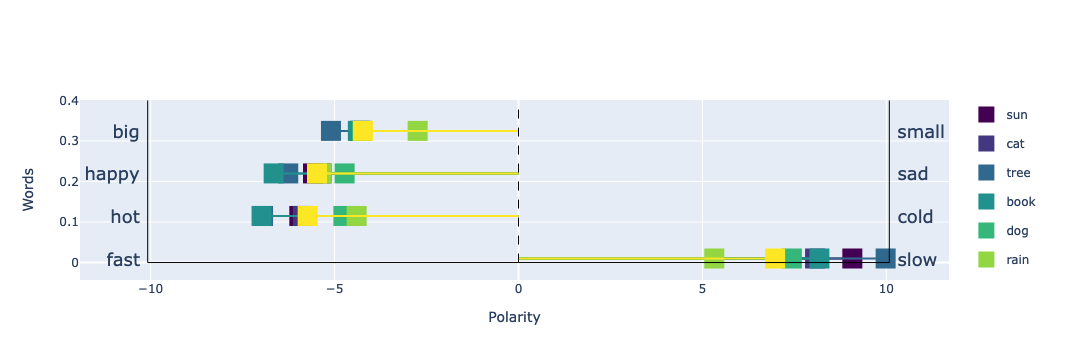

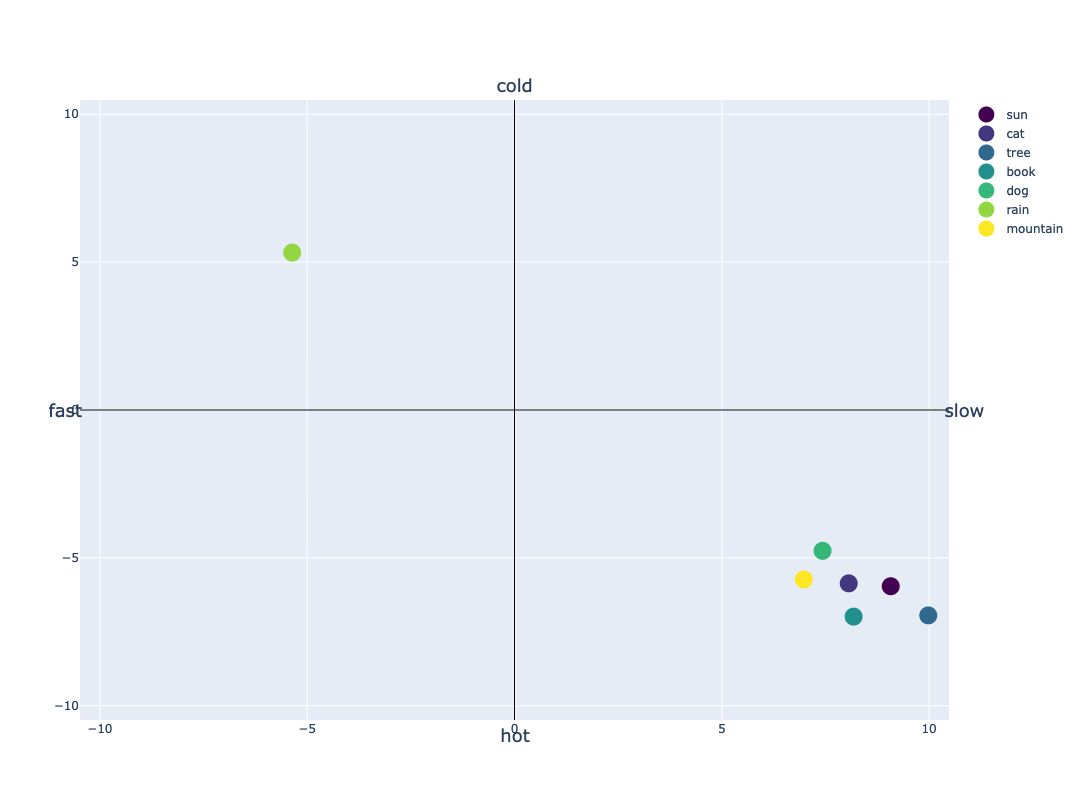

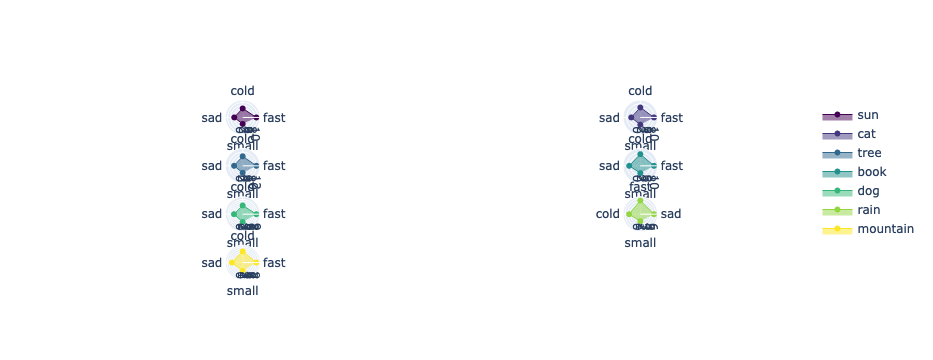

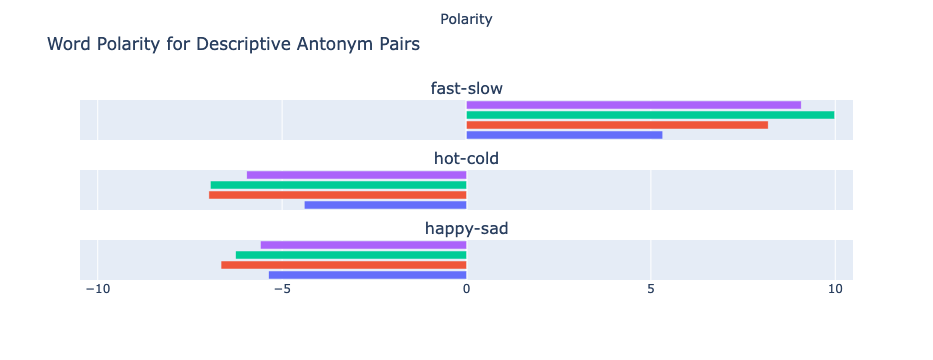

In [4]:
plotter = PolarityPlotter() 
plotter.plot_word_polarity(words, polar_dimensions)
plotter.plot_word_polarity_2d(words, polar_dimensions)
plotter.plot_word_polarity_polar_fig(words, polar_dimensions)
plotter.plot_descriptive_antonym_pairs(words, polar_dimensions, ['rain', 'book', 'tree', 'sun'], 3)

# Roberta WordEmbeddings

In [ ]:
out_path = './antonyms/'
antonym_path = "data/data_file.xlsx"

dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonyms_file_path=antonym_path)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = RoBERTaWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection', number_polar=4)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Loading antonyms from ./antonyms/lookup_anto_example_dict.pkl
Index: 0
[[['happy', ['i feel happy today ']], ['sad', ['he looks sad ']]], [['hot', ['it s hot outside ']], ['cold', ['the ice is cold to touch ']]], [['big', ['the elephant is big ']], ['small', ['the ant is small ']]], [['fast', ['the cheetah runs fast ']], ['slow', ['the snail moves slow ']]], [['good', ['eating healthy food is good for you ']], ['bad', ['smoking is bad for your health ']]]]
Top: 1
Dimension: happy <------> sad
feeling of joy feeling of sorrow
Value: -1.6392117


Index: 1
[[['happy', ['i feel happy today ']], ['sad', ['he looks sad ']]], [['hot', ['it s hot outside ']], ['cold', ['the ice is cold to touch ']]], [['big', ['the elephant is big ']], ['small', ['the ant is small ']]], [['fast', ['the cheetah runs fast ']], ['slow', ['the snail moves slow ']]], [['good', ['eating healthy food is good for you ']], ['bad', ['smoking is bad for your health ']]]]
Top: 2
Dimension: hot <------> cold
high temperatu

In [11]:
out_path = './antonyms/'
# antonym_path = "data/data_file.xlsx"
antonym_pairs = [['right', 'left'], ['correct', 'wrong'], ['allowed', 'permitted']]
# [["move", "steady"], ["slow", "fast"], ["black", "white"]]
dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=antonym_pairs)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = RoBERTaWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection', number_polar=3)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)
    print(dimension)

32 All definitions:  [['an abstract idea of that which is due to a person or governmental body by law or tradition or nature; ; - Eleanor Roosevelt'], ['location near or direction toward the right side; i.e. the side to the south when a person or object faces east'], ['the hand that is on the right side of the body'], ['a turn toward the side of the body that is on the south when the person is facing east'], ['anything in accord with principles of justice'], ['(frequently plural) the interest possessed by law or custom in some intangible thing'], ['make reparations or amends for'], ['put in or restore to an upright position'], ['regain an upright or proper position'], ['make right or correct'], ['being or located on or directed toward the side of the body to the east when facing north'], ['free from error; especially conforming to fact or truth'], ['socially right or correct'], ['in conformance with justice or law or morality'], ['correct in opinion or judgment'], ["appropriate for a c

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['right', 'left']": {'right': ['they are endowed by their Creator with certain unalienable right ', 'Certain right can never be granted to the government but must be kept in the hands of the people ', 'a right is not something that somebody gives you it is something that nobody can take away ', 'The right to free speech is protected by the First Amendment of the Constitution ', 'The right to free speech is protected by the Bill of right ', 'The right to vote is a fundamental human right ', 'The right to free speech is a fundamental human right '], 'left': ['she stood on the left ', 'The left side of the room was empty ', 'The left door opened ', 'The left side of the road was blocked ', 'The left window was open ']}, "['correct', 'wrong']": {'correct': ['correct the mistakes ', 'rectify the calculation ', 'The directions were correct ', 'The instructions were correct ', 'The homework was correct ', 'The answer was correct '], 'wrong': ['he feels that you are in the wrong ', 'The poli

0 [('correct', 'wrong', 2.1138418), ('right', 'left', 1.4462031), ('allowed', 'permitted', -0.40551564)]
1 [('correct', 'wrong', 1.83054), ('right', 'left', 1.2740289), ('allowed', 'permitted', -0.4020071)]
2 [('correct', 'wrong', 2.4473805), ('right', 'left', 1.6668365), ('allowed', 'permitted', -0.37378073)]


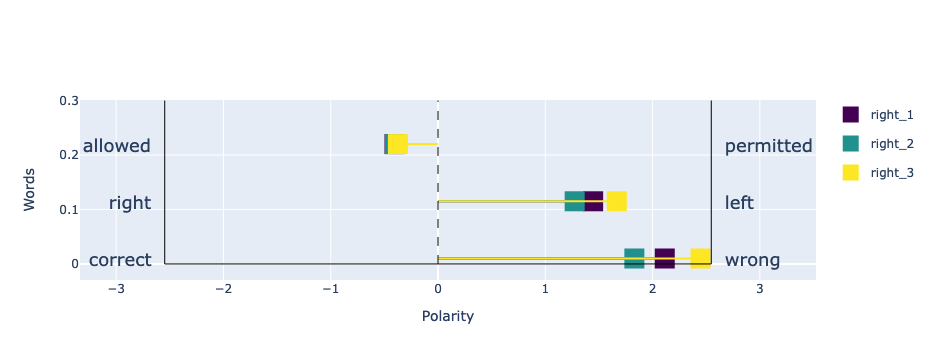

0 [('correct', 'wrong', 2.1138418), ('right', 'left', 1.4462031), ('allowed', 'permitted', -0.40551564)]
1 [('correct', 'wrong', 1.83054), ('right', 'left', 1.2740289), ('allowed', 'permitted', -0.4020071)]
2 [('correct', 'wrong', 2.4473805), ('right', 'left', 1.6668365), ('allowed', 'permitted', -0.37378073)]


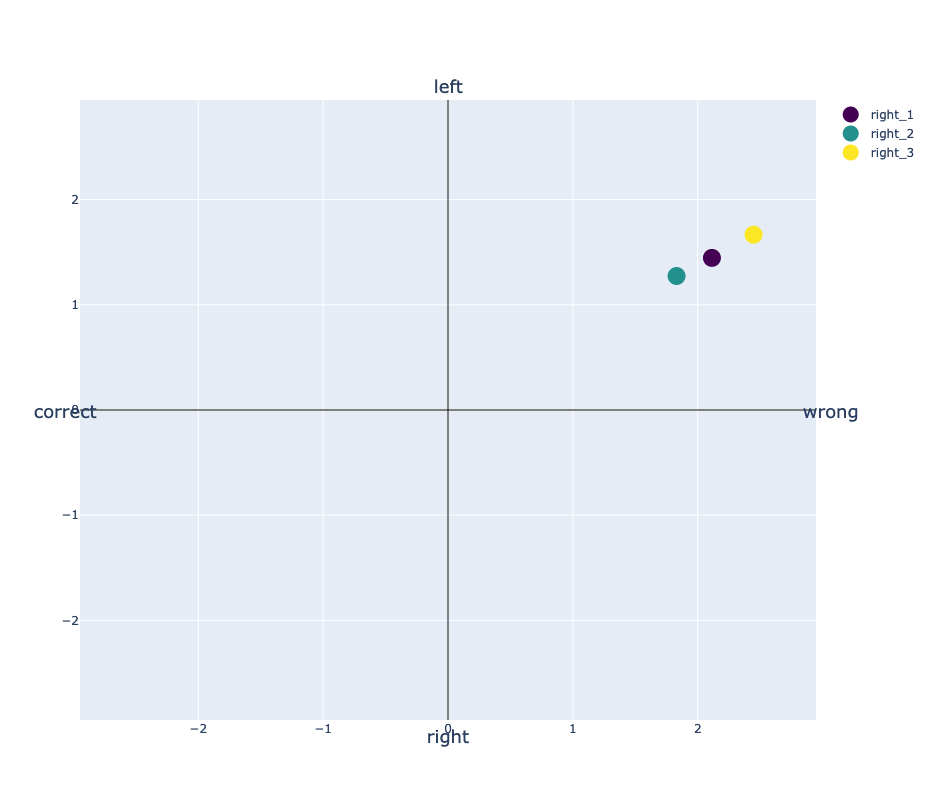

0 [('correct', 'wrong', 2.1138418), ('right', 'left', 1.4462031), ('allowed', 'permitted', -0.40551564)]
1 [('correct', 'wrong', 1.83054), ('right', 'left', 1.2740289), ('allowed', 'permitted', -0.4020071)]
2 [('correct', 'wrong', 2.4473805), ('right', 'left', 1.6668365), ('allowed', 'permitted', -0.37378073)]


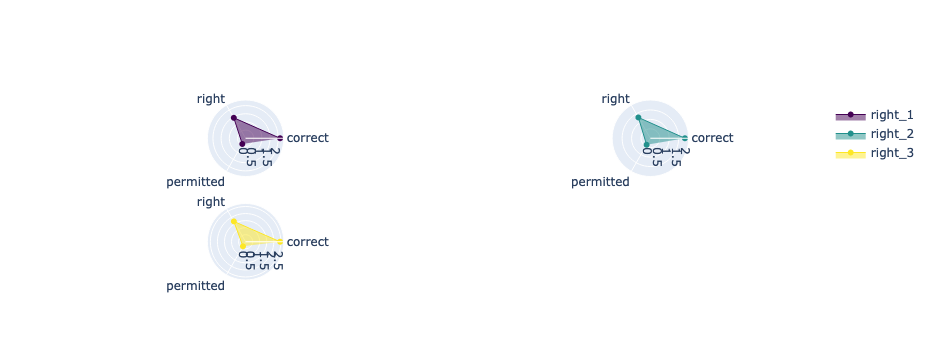

In [13]:
plotter = PolarityPlotter() 
plotter.plot_word_polarity(words, polar_dimensions)
plotter.plot_word_polarity_2d(words, polar_dimensions)
plotter.plot_word_polarity_polar_fig(words, polar_dimensions)
# plotter.plot_descriptive_antonym_pairs(words, polar_dimensions, ['rain', 'book', 'tree', 'sun'], 3)

# Alberta Word Embeddings

In [18]:
out_path = './antonyms/'
antonym_path = "data/data_file1.xlsx"

dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonyms_file_path=antonym_path)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = ALBERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection', number_polar=4)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

['i feel happy today']
['he looks sad']
['it s hot outside']
['the ice is cold to touch']
['i feel happy today']
['he looks sad']
['it s hot outside']
['the ice is cold to touch']
['i feel happy today']
['he looks sad']
['it s hot outside']
['the ice is cold to touch']
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertModel: ['predictions.dense.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.decoder.weight', 'predictions.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['happy', 'sad']": {'happy': ['i feel happy today '], 'sad': ['he looks sad ']}, "['hot', 'cold']": {'hot': ['it s hot outside '], 'cold': ['the ice is cold to touch ']}}
Nan in sentence: i feel happy today 
Nan in sentence: he looks sad 
Nan... Unable to create POLAR dimensions.
Loading antonyms from ./antonyms/lookup_anto_example_dict.pkl
In get_W [array([ 6.76304281e-01, -2.51320362e-01,  3.46465111e-02,  1.52775943e-01,
        4.29377556e-01, -5.54427445e-01, -2.70782262e-02,  9.20492649e-01,
        6.67935550e-01, -3.40186208e-02,  6.66023493e-02,  7.46252060e-01,
        1.27290636e-01, -3.73085022e-01, -6.24260902e-02, -6.47217989e-01,
       -2.35572159e-02,  7.97871709e-01, -1.77171081e-02, -3.20010483e-01,
        1.33517408e+00,  5.97072482e-01, -8.52465808e-01, -2.73860872e-01,
       -6.39296174e-02,  1.32949382e-01,  2.08647534e-01, -3.28205734e-01,
       -2.48330653e-01, -2.09165350e-01,  3.65671605e-01, -1.30871892e-01,
       -2.19259694e-01,  1.13438630e+00, -3.8

IndexError: list index out of range

In [19]:
out_path = './antonyms/'
# antonym_path = "data/data_file.xlsx"
antonym_pairs = [['right', 'left'], ['correct', 'wrong'], ['allowed', 'permitted']]
# [["move", "steady"], ["slow", "fast"], ["black", "white"]]
dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=antonym_pairs)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = RoBERTaWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection', number_polar=3)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)
    print(dimension)

32 All definitions:  [['an abstract idea of that which is due to a person or governmental body by law or tradition or nature; ; - Eleanor Roosevelt'], ['location near or direction toward the right side; i.e. the side to the south when a person or object faces east'], ['the hand that is on the right side of the body'], ['a turn toward the side of the body that is on the south when the person is facing east'], ['anything in accord with principles of justice'], ['(frequently plural) the interest possessed by law or custom in some intangible thing'], ['make reparations or amends for'], ['put in or restore to an upright position'], ['regain an upright or proper position'], ['make right or correct'], ['being or located on or directed toward the side of the body to the east when facing north'], ['free from error; especially conforming to fact or truth'], ['socially right or correct'], ['in conformance with justice or law or morality'], ['correct in opinion or judgment'], ["appropriate for a c

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['right', 'left']": {'right': ['they are endowed by their Creator with certain unalienable right ', 'Certain right can never be granted to the government but must be kept in the hands of the people ', 'a right is not something that somebody gives you it is something that nobody can take away ', 'The right to free speech is protected by the First Amendment of the Constitution ', 'The right to free speech is protected by the Bill of right ', 'The right to vote is a fundamental human right ', 'The right to free speech is a fundamental human right '], 'left': ['she stood on the left ', 'The left side of the room was empty ', 'The left door opened ', 'The left side of the road was blocked ', 'The left window was open ']}, "['correct', 'wrong']": {'correct': ['correct the mistakes ', 'rectify the calculation ', 'The directions were correct ', 'The instructions were correct ', 'The homework was correct ', 'The answer was correct '], 'wrong': ['he feels that you are in the wrong ', 'The poli

0 [('correct', 'wrong', 2.1138418), ('right', 'left', 1.4462031), ('allowed', 'permitted', -0.40551564)]
1 [('correct', 'wrong', 1.83054), ('right', 'left', 1.2740289), ('allowed', 'permitted', -0.4020071)]
2 [('correct', 'wrong', 2.4473805), ('right', 'left', 1.6668365), ('allowed', 'permitted', -0.37378073)]


/usr/local/anaconda3/envs/SensePOLAR/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




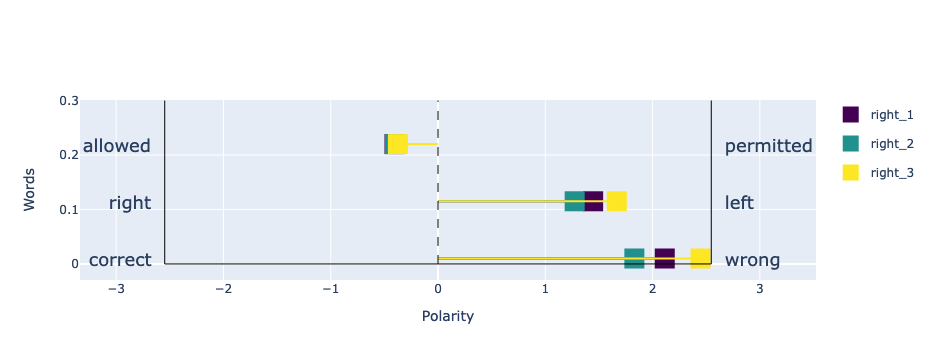

0 [('correct', 'wrong', 2.1138418), ('right', 'left', 1.4462031), ('allowed', 'permitted', -0.40551564)]
1 [('correct', 'wrong', 1.83054), ('right', 'left', 1.2740289), ('allowed', 'permitted', -0.4020071)]
2 [('correct', 'wrong', 2.4473805), ('right', 'left', 1.6668365), ('allowed', 'permitted', -0.37378073)]


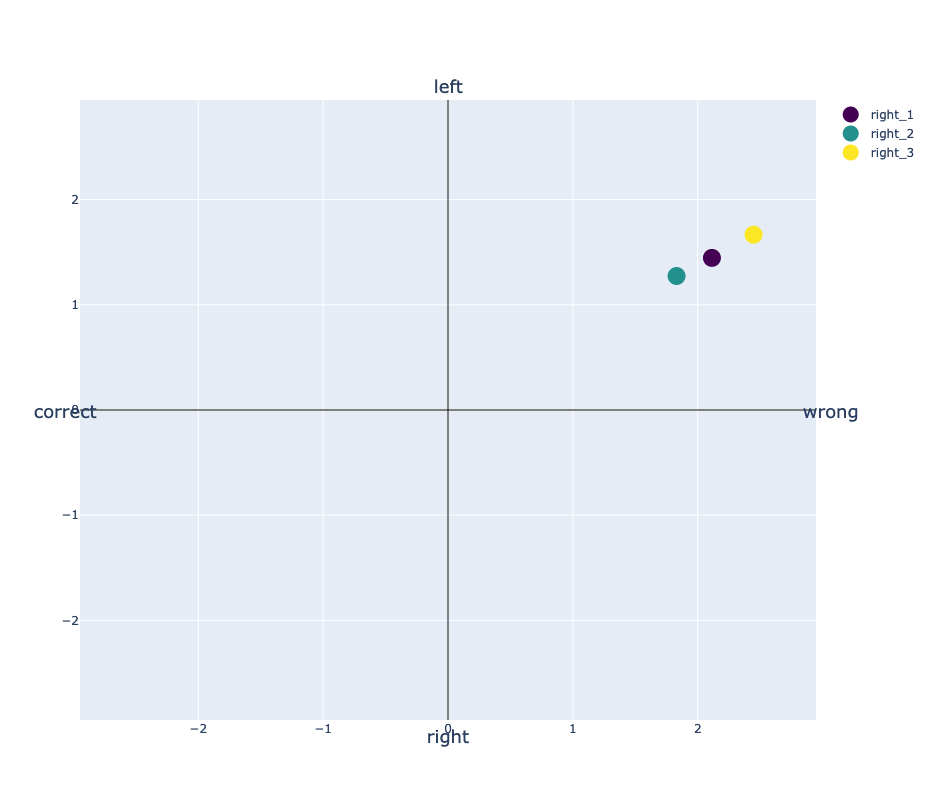

0 [('correct', 'wrong', 2.1138418), ('right', 'left', 1.4462031), ('allowed', 'permitted', -0.40551564)]
1 [('correct', 'wrong', 1.83054), ('right', 'left', 1.2740289), ('allowed', 'permitted', -0.4020071)]
2 [('correct', 'wrong', 2.4473805), ('right', 'left', 1.6668365), ('allowed', 'permitted', -0.37378073)]


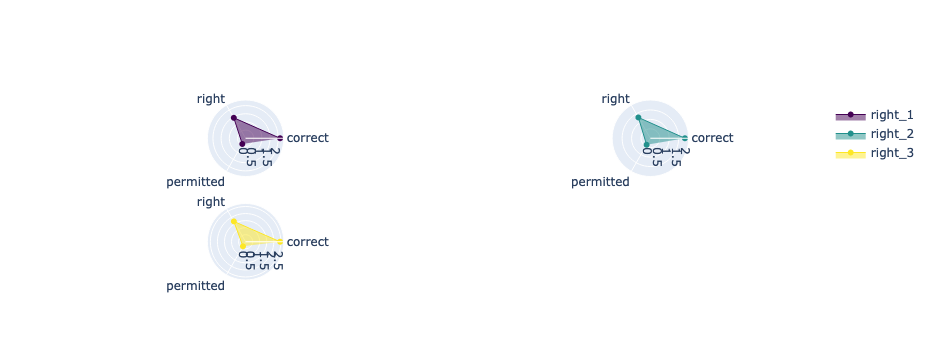

KeyError: 'rain'

In [20]:
plotter = PolarityPlotter() 
plotter.plot_word_polarity(words, polar_dimensions)
plotter.plot_word_polarity_2d(words, polar_dimensions)
plotter.plot_word_polarity_polar_fig(words, polar_dimensions)
plotter.plot_descriptive_antonym_pairs(words, polar_dimensions, ['rain', 'book', 'tree', 'sun'], 3)

# Others

In [23]:
out_path = './antonyms/'
# antonym_path = "data/data_file.xlsx"
antonym_pairs = [['right', 'left'], ['correct', 'wrong'], ['allowed', 'permitted']]
# [["move", "steady"], ["slow", "fast"], ["black", "white"]]
dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=antonym_pairs)
lookupSpace.create_lookup_files([[1,0], [2,1], [3,0]])

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection', number_polar=3)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)
    print(dimension)

32 All definitions:  [['an abstract idea of that which is due to a person or governmental body by law or tradition or nature; ; - Eleanor Roosevelt'], ['location near or direction toward the right side; i.e. the side to the south when a person or object faces east'], ['the hand that is on the right side of the body'], ['a turn toward the side of the body that is on the south when the person is facing east'], ['anything in accord with principles of justice'], ['(frequently plural) the interest possessed by law or custom in some intangible thing'], ['make reparations or amends for'], ['put in or restore to an upright position'], ['regain an upright or proper position'], ['make right or correct'], ['being or located on or directed toward the side of the body to the east when facing north'], ['free from error; especially conforming to fact or truth'], ['socially right or correct'], ['in conformance with justice or law or morality'], ['correct in opinion or judgment'], ["appropriate for a c

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['right', 'left']": {'right': ['he stood on the right ', 'The right decision should be made ', 'The right answer should be chosen ', 'The right door should be opened ', 'The right path should be taken '], 'left': ['she stood on the left ', 'The left side of the room was empty ', 'The left door opened ', 'The left side of the road was blocked ', 'The left window was open ']}, "['correct', 'wrong']": {'correct': ['She chastised him for his insensitive remarks ', 'The student was correct severely for his incorrect answer ', 'The teacher censured the student severely for his incorrect answer ', 'The teacher correct the student for his incorrect answer ', 'He was correct severely for his mistake '], 'wrong': ['The decision was wrong ', 'The answer was wrong ', 'The instructions were incorrect ', 'The information was incorrect ']}, "['allowed', 'permitted']": {'allowed': ['I will earmark this money for your research ', 'She sets aside time for meditation every day ', 'The government allowe

['right_1', 'right_2', 'right_3']
0 [('allowed', 'permitted', 1.5651354), ('right', 'left', 0.5085764), ('correct', 'wrong', 0.49014968)]
1 [('right', 'left', 1.9925101), ('allowed', 'permitted', 0.6681285), ('correct', 'wrong', 0.15952075)]
2 [('allowed', 'permitted', 1.2592714), ('right', 'left', 0.5959795), ('correct', 'wrong', -0.21045172)]


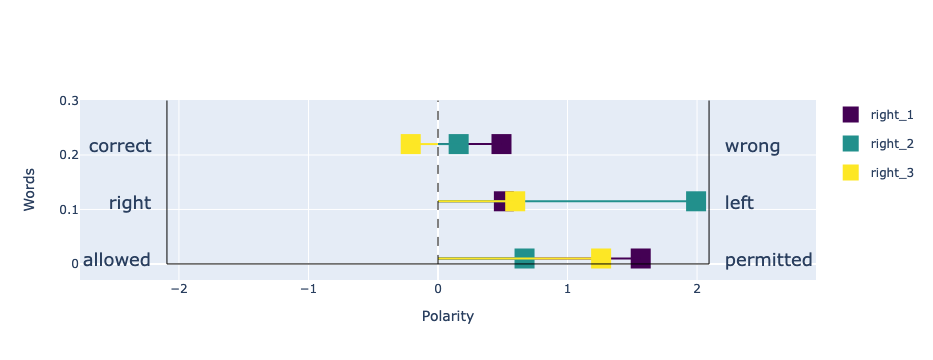

In [22]:
print(words)
plotter = PolarityPlotter() 
plotter.plot_word_polarity(words, polar_dimensions)

In [5]:
out_path = '../SensePOLAR-TeamProject/antonyms/'
# antonym_path = "data_file.xlsx"
dims = [['hot', 'cold'], ['bad', 'good'], ['intelligent', 'unintelligent'], ['capable', 'incapable']]

dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=dims)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = ['fire', "sun"], ["the fire is burning", "sun is shining"]
wp = WordPolarity(model, antonym_path=antonym_path,lookup_path=out_path, method='projection', number_polar=2)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Loading antonyms from ../SensePOLAR-TeamProject/antonyms/lookup_anto_example_dict.pkl
Index: 0
[[['test', ['test is first example ', 'second sentence example of test ']], ['test2', ['test2 is first example ', 'second sentence example of test2 ']]], [['one', ['example for one ', 'one example sentence ']], ['two', ['example for two ', 'two example sentence ']]]]
Top: 1
Dimension: test <------> test2
   
Value: -0.87755775


Index: 1
[[['test', ['test is first example ', 'second sentence example of test ']], ['test2', ['test2 is first example ', 'second sentence example of test2 ']]], [['one', ['example for one ', 'one example sentence ']], ['two', ['example for two ', 'two example sentence ']]]]
Top: 2
Dimension: one <------> two
   
Value:0.5780946016311646


Index: 0
[[['test', ['test is first example ', 'second sentence example of test ']], ['test2', ['test2 is first example ', 'second sentence example of test2 ']]], [['one', ['example for one ', 'one example sentence ']], ['two', ['e

/usr/local/anaconda3/envs/SensePOLAR/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




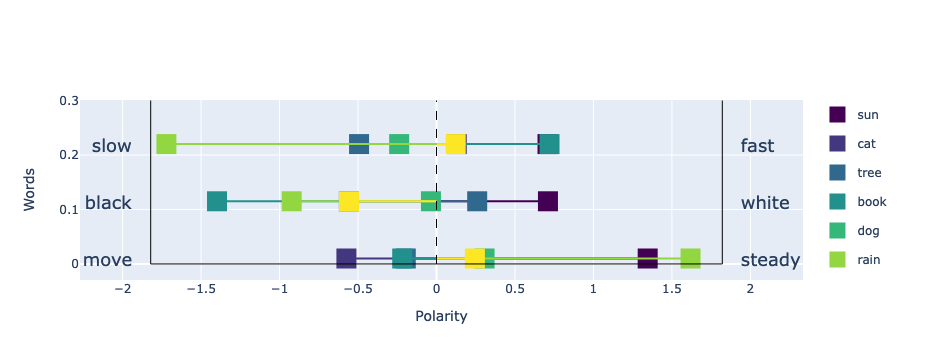

In [4]:
plotter = PolarityPlotter() 
plotter.plot_word_polarity(words, polar_dimensions)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['hot', 'cold']": {'hot': ['hot stove ', 'hot water ', 'a hot august day ', 'a hot stuffy room ', 'she s hot and tired ', 'a hot forehead ', 'the fighting became hot and heavy ', 'a hot engagement ', 'a hot temper ', 'a hot topic ', 'a hot new book ', 'a hot love affair ', 'a hot argument ', 'hot pink ', 'was hot for her ', 'hot pants ', 'hot merchandise ', 'a hot car ', 'a hot sports car ', 'got off to a hot start ', 'in hot pursuit ', 'a red hot line drive ', 'a hot suspect ', 'hot salsa ', 'jalapeno peppers are very hot ', 'a hot drummer ', 'he s hot tonight ', 'one of the hot young talents ', 'cabbage patch dolls were hot last season ', 'make it hot for him ', 'in the hot seat ', 'in hot water ', 'news hot off the press ', 'red hot information ', 'hot at craps ', 'the dice are hot tonight ', 'he s hot at math but not so hot at history ', 'a hot scent ', 'hot for travel ', 'you are hot ', 'hot fuel rods ', 'a hot laboratory ', 'a hot wire ', 'a hot week on the stock market '], 'co

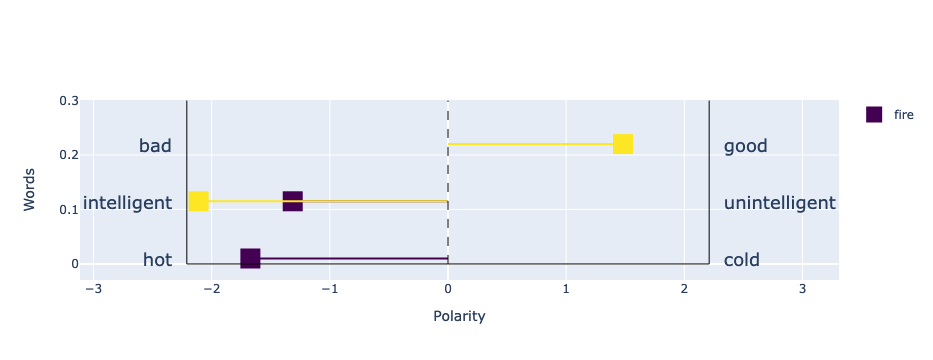

In [20]:
out_path = './antonyms/'
# antonym_path = "data_file.xlsx"
dims = [['hot', 'cold'], ['bad', 'good'], ['intelligent', 'unintelligent'], ['capable', 'incapable']]

dictionary = Dictionary('wordnet', api_key='')    
definition = [dictionary.get_definitions(word[[0]]) in dims for word in words]
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=dims)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = ['fire', "sun"], ["the fire is burning", "sun is shining"]
wp = WordPolarity(model, antonym_path=antonym_path,lookup_path=out_path, method='projection', number_polar=2)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

plotter.plot_word_polarity(words, polar_dimensions)

In [21]:
# plotter.plot_word_polarity_2d(words, polar_dimensions)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['test', 'test2']": {'test': ['test is first example ', 'second sentence example of test '], 'test2': ['test2 is first example ', 'second sentence example of test2 ']}, "['one', 'two']": {'one': ['example for one ', 'one example sentence '], 'two': ['example for two ', 'two example sentence ']}}
Loading antonyms from ../SensePOLAR-TeamProject/antonyms/lookup_anto_example_dict.pkl
Index: 0
[[['test', ['test is first example ', 'second sentence example of test ']], ['test2', ['test2 is first example ', 'second sentence example of test2 ']]], [['one', ['example for one ', 'one example sentence ']], ['two', ['example for two ', 'two example sentence ']]]]
Top: 1
Dimension: test <------> test2
   
Value: -0.0929523


Index: 1
[[['test', ['test is first example ', 'second sentence example of test ']], ['test2', ['test2 is first example ', 'second sentence example of test2 ']]], [['one', ['example for one ', 'one example sentence ']], ['two', ['example for two ', 'two example sentence ']]]]

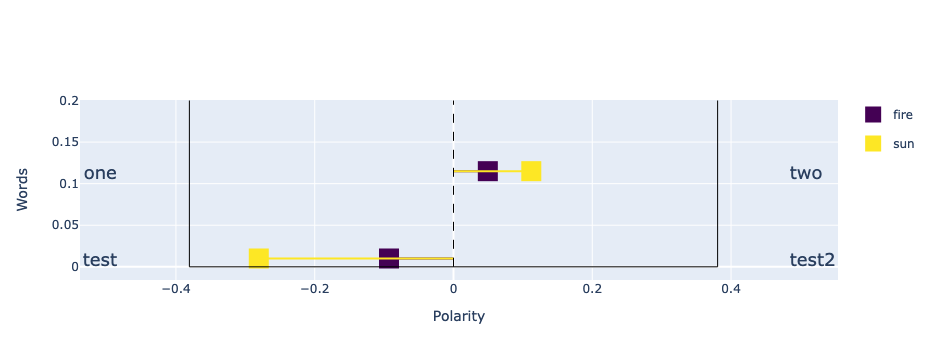

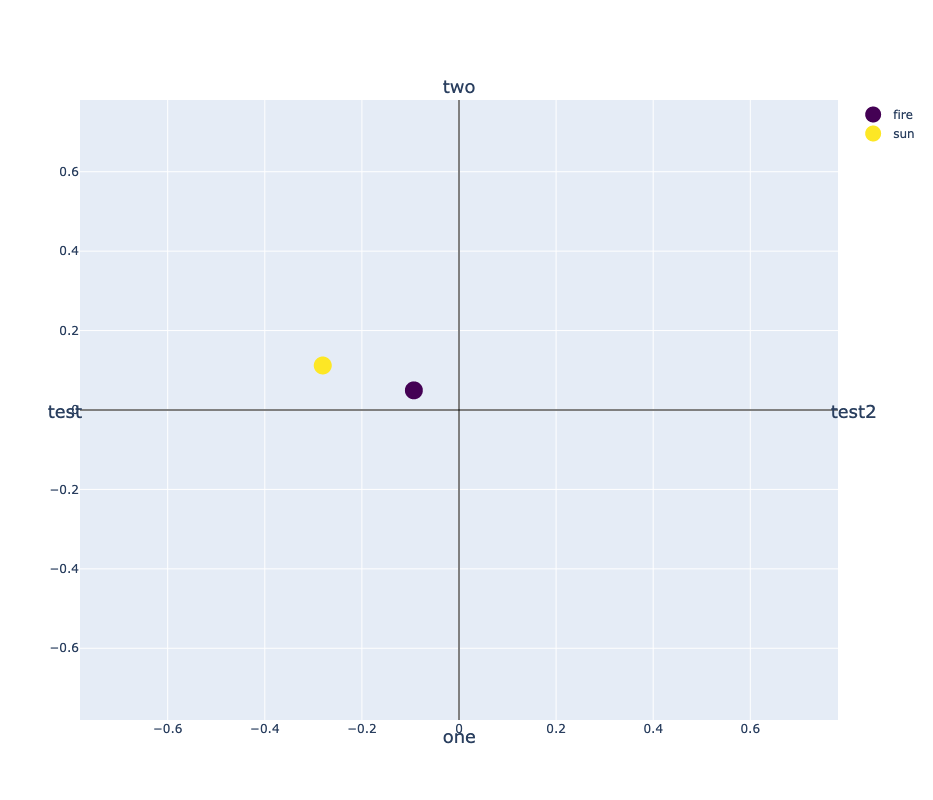

In [22]:
out_path = '../SensePOLAR-TeamProject/antonyms/'
# antonym_path = "data_file.xlsx"
dims = [['hot', 'cold'], ['bad', 'good'], ['intelligent', 'unintelligent'], ['capable', 'incapable']]

dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
# lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=dims)
# lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = ['fire', "sun"], ["the fire is burning", "sun is shining"]
wp = WordPolarity(model, antonym_path=antonym_path,lookup_path=out_path, method='base-change', number_polar=2)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

plotter.plot_word_polarity(words, polar_dimensions)
plotter.plot_word_polarity_2d(words, polar_dimensions)

In [35]:
def get_most_descriptive_antonym_pairs(words, polar_dimensions, inspect_words, n):
    """
    Retrieves the common antonym pairs that best describe the inspected words.

    Args:
        words (list): A list of all words.
        polar_dimensions (list): A list of polar dimensions.
        inspect_words (list): A subset of words to inspect.
        n (int): Number of antonym pairs to retrieve.

    Returns:
        list: The common antonym pairs that best describe the inspected words,
              along with the polarity values.

    Note:
        This implementation assumes that each word has only one antonym pair associated with it.
    """
    word_dict = {word: None for word in words}
    print(word_dict)
    for idx, item in enumerate(polar_dimensions):
        antonym_dict = {}
        for antonym1, antonym2, value in item:
            antonym_dict[(antonym1, antonym2)] = value
        word_dict[words[idx]] = antonym_dict

    common_antonyms = set(word_dict[inspect_words[0]].keys())
    for word in inspect_words[1:]:
        common_antonyms.intersection_update(word_dict[word].keys())

    descriptive_pairs = []
    scores = []

    for antonym in common_antonyms:
        score = sum(abs(word_dict[word][antonym]) for word in inspect_words)
        descriptive_pairs.append(antonym)
        scores.append(score)

    sorted_pairs = [pair for _, pair in sorted(zip(scores, descriptive_pairs), reverse=True)]

    if len(sorted_pairs) > n:
        sorted_pairs = sorted_pairs[:n]

    result = []
    for pair in sorted_pairs:
        polarities = [word_dict[word][pair] for word in inspect_words]
        result.append((pair, polarities))

    return result[:n]


In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors as colors

def plot_descriptive_antonym_pairs(words, descriptive_pairs):
    """
    Plots each word against the descriptive antonym pairs using a horizontal bar plot.

    Args:
        words (list): A list of words.
        descriptive_pairs (list): The descriptive antonym pairs, along with the polarity values.

    Returns:
        None
    """
    fig = make_subplots(rows=len(descriptive_pairs), cols=1, shared_xaxes=True, subplot_titles=[f"{pair[0][0]}-{pair[0][1]}" for pair in descriptive_pairs])

    #take max absolute value from all polarity values
    scale = max(max([abs(n) for n in polars]) for _, polars in descriptive_pairs)
    min_polarity = -scale
    max_polarity = scale

    color_sequence = colors.qualitative.Plotly

    for i, (antonym_pair, polarity_values) in enumerate(descriptive_pairs):
        fig_idx = i + 1

        # Assign colors to words in each antonym pair
        color_map = {word: color_sequence[j % len(color_sequence)] for j, word in enumerate(words)}
        legend_names = []  # List to store legend names for each word in the antonym pair

        for j, word in enumerate(words):
            if word not in legend_names:
                legend_names.append(word)
                fig.add_trace(go.Bar(
                    y=[word],
                    x=[polarity_values[j]],
                    name=word,
                    marker=dict(color=color_map[word]),  # Assign the color for each word
                    orientation='h',
                    showlegend=False,
                    offsetgroup=f"Pair {fig_idx}"
                ), row=fig_idx, col=1)

    fig.update_layout(
        title="Word Polarity for Descriptive Antonym Pairs",
        xaxis_title="Polarity",
        barmode="group",
        legend_traceorder="reversed",
        xaxis=dict(range=[min_polarity, max_polarity])  # Set the x-axis range from min to max polarity values
    )

    fig.update_yaxes(showticklabels=False)

    fig.show()


In [34]:
get_most_descriptive_antonym_pairs(words, polar_dimensions, ['tree', 'rain'], 4)

{'fire': None, 'sun': None, 'tree': None, 'rain': None}


AttributeError: 'NoneType' object has no attribute 'keys'

In [27]:
plot_descriptive_antonym_pairs(['sun', 'rain'], get_most_descriptive_antonym_pairs(words, polar_dimensions, ['tree', 'rain'], 4))

KeyError: 'tree'

In [ ]:
get_most_descriptive_antonym_pairs(words, polar_dimensions, ['tree', 'rain'], 4)

[(('big', 'small'), [-1.1064599, -2.539312]),
 (('good', 'bad'), [-0.7773825, 0.6468782]),
 (('hot', 'cold'), [-0.35254246, -1.0438247])]